In [ ]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 593kB 4.1MB/s 
     |████████████████████████████████| 1.1MB 41.5MB/s 
     |████████████████████████████████| 174kB 45.2MB/s 
     |████████████████████████████████| 71kB 9.1MB/s 
     |████████████████████████████████| 849kB 43.2MB/s 
     |████████████████████████████████| 122kB 45.6MB/s 
     |████████████████████████████████| 92kB 12.4MB/s 
     |████████████████████████████████| 1.2MB 42.7MB/s 
     |████████████████████████████████| 6.3MB 27.2MB/s 
     |████████████████████████████████| 686kB 48.8MB/s 
     |████████████████████████████████| 645kB 51.6MB/s 
     |████████████████████████████████| 112kB 63.2MB/s 
     |████████████████████████████████| 194kB 51.9MB/s 
     |████████████████████████████████| 358kB 49.3MB/s 
     |████████████████████████████████| 102kB 12.2MB/s 
     |████████████████████████████████| 38.2MB 102kB/s 


In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data = DataLoader.from_folder('/content/drive/MyDrive/data capstone')

INFO:tensorflow:Load image with size: 128, num_label: 4, labels: bajra_mendut, makara_mendut, relief_betet, relief_jataka.


In [ ]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

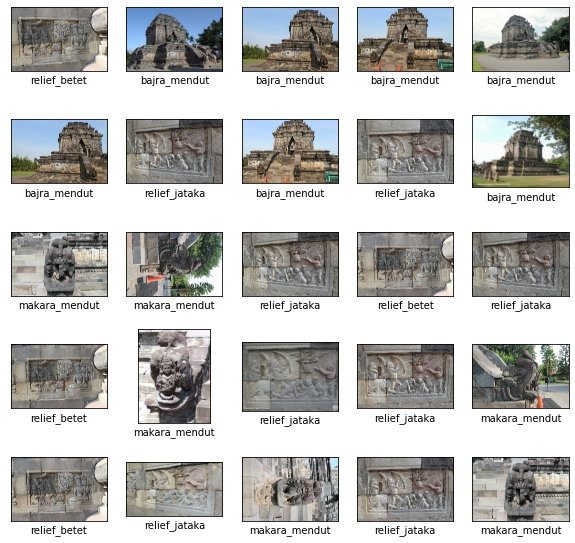

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'), validation_data=validation_data)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
3/3 [==============================] - 39s 14s/step - loss: 1.7142 - accuracy: 0.3333
Epoch 2/5
3/3 [==============================] - 11s 3s/step - loss: 1.0261 - accuracy: 0.6771
Epoch 3/5
3/3 [==============================] - 9s 3s/step - loss: 0.6219 - accuracy: 0.8646
Epoch 4/5
3/3 [==============================] - 9s 3s/step - loss: 0.5736 - accuracy: 0.9062
Epoch 5/5
3/3 [==============================] - 9s 3s/step - loss: 0.5202 - accuracy: 0.9896


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
loss, accuracy = model.evaluate(test_data)

1/1 [==============================] - 4s 4s/step - loss: 0.6076 - accuracy: 0.9231


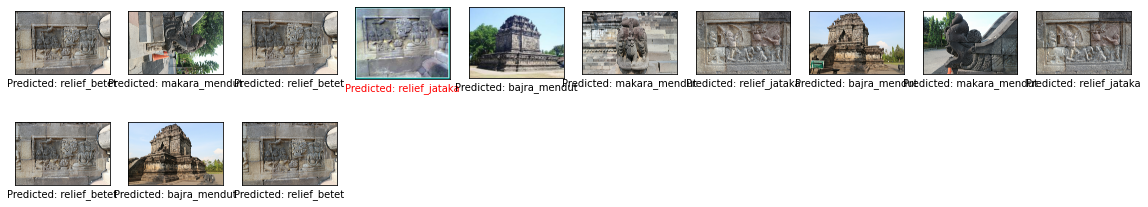

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(75)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpja8igwpn/assets


INFO:tensorflow:Assets written to: /tmp/tmpja8igwpn/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpwthbzep0/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpwthbzep0/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [ ]:
model.evaluate_tflite('model.tflite', test_data)

{'accuracy': 0.9230769230769231}